In [29]:
! pip install -r ../requirements.txt
import numpy as np
from utils import db_connect
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn.pipeline import make_pipeline
%matplotlib inline


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [30]:
# Example importing the CSV here
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df
# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [32]:
df["sex"].value_counts()
# ~50/50 proporcion hombres/mujeres

male      676
female    662
Name: sex, dtype: int64

In [33]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:>

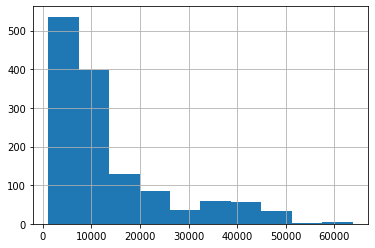

In [34]:
#Analisis de la variable target (charges)
df["charges"].hist()


<AxesSubplot:>

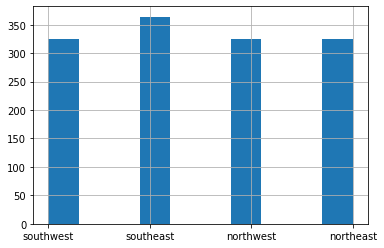

In [35]:
df["region"].hist()

In [36]:
fig = px.box(df, x="sex", y="charges")
fig.show()


In [37]:
fig = px.box(df, x="smoker", y="charges")
fig.show()


In [38]:
fig = px.box(df, x="children", y="charges")
fig.show()

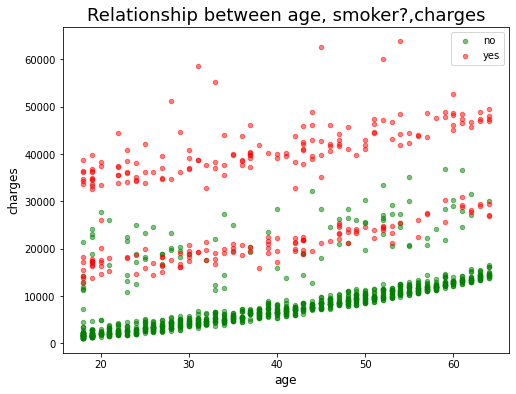

In [39]:
ax1 = df[df['smoker'] == 'no'].plot(kind='scatter', x='age', y='charges', color='green', alpha=0.5, figsize=(8,6))
df[df['smoker'] == 'yes'].plot(kind='scatter', x='age', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between age, smoker?,charges', size=18)
plt.xlabel('age', size=12)
plt.ylabel('charges', size=12);


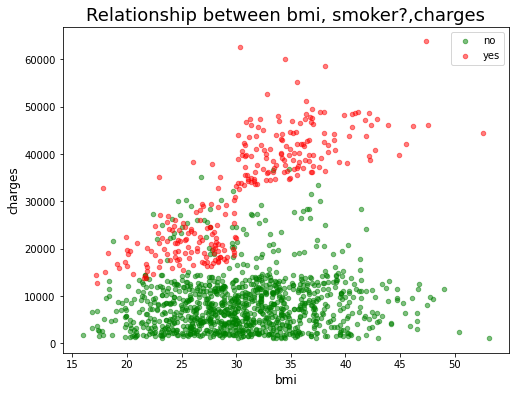

In [40]:
ax1 = df[df['smoker'] == 'no'].plot(kind='scatter', x='bmi', y='charges', color='green', alpha=0.5, figsize=(8,6))
df[df['smoker'] == 'yes'].plot(kind='scatter', x='bmi', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between bmi, smoker?,charges', size=18)
plt.xlabel('bmi', size=12)
plt.ylabel('charges', size=12);

In [41]:
#Pasamos las features sex y smoker a numericas
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [42]:
def conv_region(region_name):
    if region_name in df["region"].unique():
        return list(df["region"].unique()).index(region_name)
    else:
        return "region no encontrada"
df['region'] = df['region'].apply(conv_region)


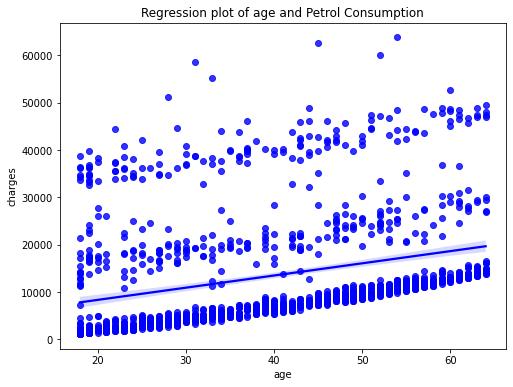

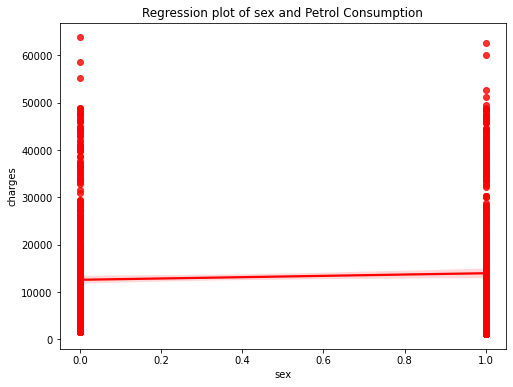

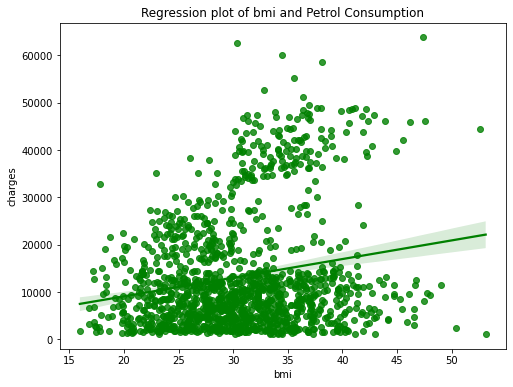

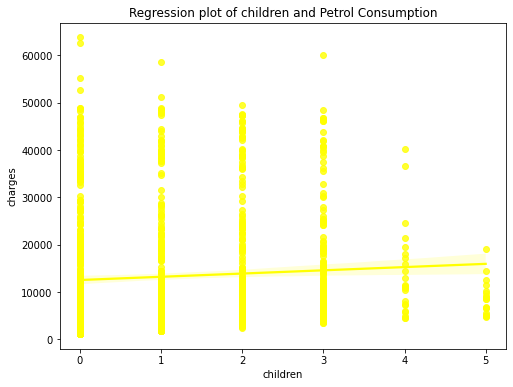

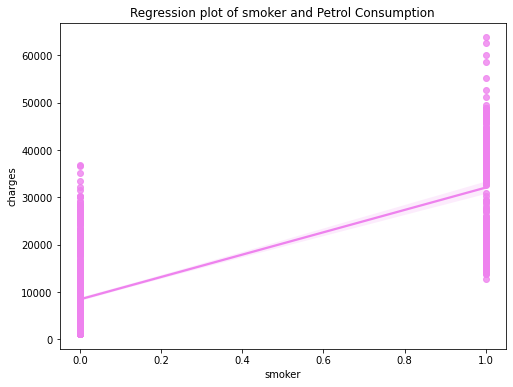

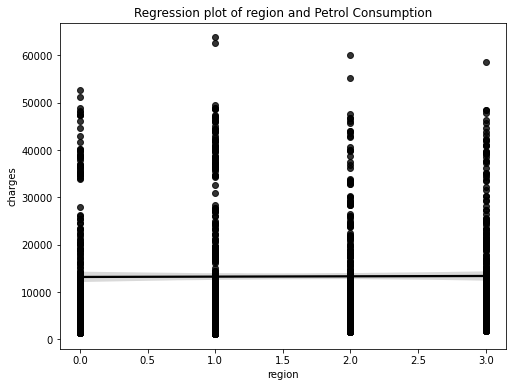

In [43]:
enumerate(df.drop(['charges'], axis=1).columns)
colors = ['blue','red','green','yellow','violet','black']
for i,var in enumerate(df.drop(['charges'], axis=1).columns):
    plt.figure(figsize=(8,6))
    sns.regplot(x=var, y='charges', data=df, color=colors[i]).set(title=f'Regression plot of {var} and Petrol Consumption') #fit_reg=False


<AxesSubplot:>

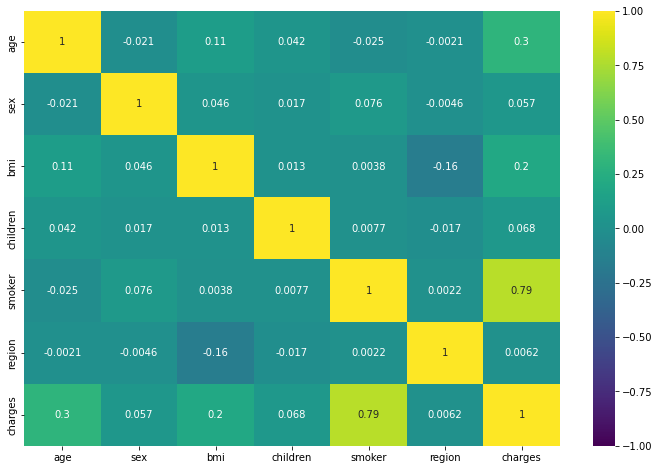

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)

There is a strong correlation between the feature **smoker** and our **target**, we can see that by plotting the smoker feature against our target (charges) and we will see that the mean of the charges of the people that smoke is significantly greater than the non-smokers. Also in the coorelation table the Pearson coorelation is high (0.79)

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [46]:
df.to_csv('/workspace/Linear-Regression-Project-Tutorial/data/df_data.csv')

## Linear Regression

In [47]:
# Regression model
X = df.drop(['charges'], axis=1)
y = df['charges']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # como son pocos datos, el split es 80/20

In [49]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,1
1336,21,0,25.800,0,0,0


In [50]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = regr.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

           Actual     Predicted
764    9095.06825   8924.407244
887    5272.17580   7116.295018
890   29330.98315  36909.013521
1293   9301.89355   9507.874691
259   33750.29180  27013.350008
...           ...           ...
109   47055.53210  39116.968669
575   12222.89830  11814.555568
535    6067.12675   7638.107736
543   63770.42801  40959.081722
846    9872.70100  12258.228529

[268 rows x 2 columns]


Scores:

In [52]:

print(f"socre (R2): {regr.score(X_test,y_test)}")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', metrics.mean_squared_error(y_test, y_pred,squared=False))


socre (R2): 0.7833463107364539
MAE: 4186.508898366432
MSE: 33635210.431178406
RMSE: 5799.587091438356


In [53]:
coefficients_df = pd.DataFrame({"Features":df.drop(['charges'], axis=1).columns,"Coefs":regr.coef_})
coefficients_df

,Features,Coefs
0,age,257.056264
1,sex,-18.791457
2,bmi,335.781491
3,children,425.091456
4,smoker,23647.818096
5,region,271.284266


# Tuning Hyperparameters

In [54]:
#poly = PolynomialFeatures(degree=2, include_bias=True) # degree=2, interaction_only=False, include_bias=True

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(4),'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid)

grid.fit(X_train, y_train)


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

GridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([0, 1, 2, 3])})

In [55]:
print(f"These are the best hyper parameters we found {grid.best_params_}")

These are the best hyper parameters we found {'linearregression__fit_intercept': False, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2}


In [56]:
tunned_model = grid.best_estimator_
tunned_model.fit(X_train,y_train)
y_pred_tunned = tunned_model.predict(X_test)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





In [57]:
print(f"socre (R2): {tunned_model.score(X_test,y_test)}")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_tunned))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_tunned))
print('RMSE:', metrics.mean_squared_error(y_test, y_pred_tunned,squared=False))

socre (R2): 0.8677566718537744
MAE: 2730.3155816804224
MSE: 20530608.942951884
RMSE: 4531.07150053405


We can see the (as expected) performance of the tunned model is significantly better than the previous model